# Visualize the performance of India’s batting in the match where they scored highest runs in 2016.

# import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib notebook

# Load Dataset

In [2]:
IB = pd.read_csv("india-batting.csv")

In [3]:
IB.head(5)

,Player,Player Link,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date
0,RG Sharma,/ci/content/player/34102.html,205,171*,163,13,7,104.90,1,Australia,Perth,12 Jan 2016
1,V Kohli,/ci/content/player/253802.html,202,154*,134,16,1,114.92,2,New Zealand,Mohali,23 Oct 2016
2,RG Sharma,/ci/content/player/34102.html,215,150,133,13,6,112.78,2,South Africa,Kanpur,11 Oct 2015
3,Yuvraj Singh,/ci/content/player/36084.html,183,150,127,21,3,118.11,1,England,Cuttack,19 Jan 2017
4,RG Sharma,/ci/content/player/34102.html,228,138,139,9,4,99.28,1,Australia,Melbourne,18 Jan 2015


In [4]:
IB.columns

Index(['Player', 'Player Link', 'Minutes', 'Runs', 'Balls Faced', 'Fours',
       'Sixes', 'Strike Rate', 'Inns', 'Opposition', 'Ground', 'Start Date'],
      dtype='object')

# Split the year from 'Start Date' columns and create a new column name 'year'

In [5]:
year=[]
for i in range(len(IB)):
    x = IB['Start Date'][i].split(" ")[-1]
    year.append(x)

In [6]:
year= pd.DataFrame(year,columns=["year"])
mr = [IB,year]

In [7]:
df=pd.concat(mr,axis=1)
df.head(5)

,Player,Player Link,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date,year
0,RG Sharma,/ci/content/player/34102.html,205,171*,163,13,7,104.90,1,Australia,Perth,12 Jan 2016,2016
1,V Kohli,/ci/content/player/253802.html,202,154*,134,16,1,114.92,2,New Zealand,Mohali,23 Oct 2016,2016
2,RG Sharma,/ci/content/player/34102.html,215,150,133,13,6,112.78,2,South Africa,Kanpur,11 Oct 2015,2015
3,Yuvraj Singh,/ci/content/player/36084.html,183,150,127,21,3,118.11,1,England,Cuttack,19 Jan 2017,2017
4,RG Sharma,/ci/content/player/34102.html,228,138,139,9,4,99.28,1,Australia,Melbourne,18 Jan 2015,2015


# Find all rows in the year 2016 from new dataframe and remove 'DND' rows from the dataframe which appear in the 'Runs' columns

In [8]:
df_16 = df[df["year"]=="2016"]

In [9]:
df_16=df_16.reset_index(drop=True)
df_16.columns

Index(['Player', 'Player Link', 'Minutes', 'Runs', 'Balls Faced', 'Fours',
       'Sixes', 'Strike Rate', 'Inns', 'Opposition', 'Ground', 'Start Date',
       'year'],
      dtype='object')

In [10]:
Runs = np.array(df_16["Runs"])

In [11]:
np.squeeze(np.where(Runs=="DNB"))

array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142])

In [12]:
ndf_16=df_16[0:88]
ndf_16.head(5)

,Player,Player Link,Minutes,Runs,Balls Faced,Fours,Sixes,Strike Rate,Inns,Opposition,Ground,Start Date,year
0,RG Sharma,/ci/content/player/34102.html,205,171*,163,13,7,104.90,1,Australia,Perth,12 Jan 2016,2016
1,V Kohli,/ci/content/player/253802.html,202,154*,134,16,1,114.92,2,New Zealand,Mohali,23 Oct 2016,2016
2,S Dhawan,/ci/content/player/28235.html,154,126,113,14,2,111.50,2,Australia,Canberra,20 Jan 2016,2016
3,RG Sharma,/ci/content/player/34102.html,175,124,127,11,3,97.63,1,Australia,Brisbane,15 Jan 2016,2016
4,V Kohli,/ci/content/player/253802.html,174,117,117,7,2,100.00,1,Australia,Melbourne,17 Jan 2016,2016


# Create a Dateframe of unique players name and their maximum score 

In [13]:
ndf_16.Player.unique()

array(['RG Sharma', 'V Kohli', 'S Dhawan', 'MK Pandey', 'KL Rahul',
       'AM Rahane', 'MS Dhoni', 'AT Rayudu', 'FY Fazal', 'KM Jadhav',
       'KK Nair', 'AR Patel', 'HH Pandya', 'DS Kulkarni', 'RA Jadeja',
       'UT Yadav', 'A Mishra', 'R Dhawan', 'Gurkeerat Singh', 'B Kumar',
       'J Yadav', 'R Ashwin', 'I Sharma', 'JJ Bumrah'], dtype=object)

In [14]:
playernames = ndf_16.Player.unique()

In [15]:
runs=[]
for i in range(len(ndf_16)):
    try:
        r = np.int(ndf_16['Runs'][i])
    except:
        r= np.int(ndf_16.Runs.unique()[0].split("*")[0])
    runs.append(r)
modRun = pd.DataFrame(runs,columns=["modRun"])
modDf  = pd.concat([ndf_16,modRun],axis=1)

In [16]:
def PlayerMaxRun(playername):
    tmpPlayer     = modDf[modDf["Player"]==playername]
    tmpPlayer     = tmpPlayer.reset_index(drop=True)
    maxrun        = np.max(np.array(tmpPlayer["modRun"]))
    totalrun      = sum(np.array(tmpPlayer["modRun"]))
    return (maxrun,totalrun)

In [17]:
tb1=[]
rnn=[]
for i in playernames:
    [mxrn,trn] = PlayerMaxRun(i)
    tb1.append([i,mxrn,trn])
    rnn.append(mxrn)

In [18]:
tb1

[['RG Sharma', 171, 564],
 ['V Kohli', 171, 842],
 ['S Dhawan', 126, 287],
 ['MK Pandey', 171, 567],
 ['KL Rahul', 171, 375],
 ['AM Rahane', 89, 284],
 ['MS Dhoni', 80, 278],
 ['AT Rayudu', 171, 342],
 ['FY Fazal', 171, 171],
 ['KM Jadhav', 171, 383],
 ['KK Nair', 39, 46],
 ['AR Patel', 38, 79],
 ['HH Pandya', 36, 45],
 ['DS Kulkarni', 171, 171],
 ['RA Jadeja', 171, 518],
 ['UT Yadav', 171, 351],
 ['A Mishra', 14, 15],
 ['R Dhawan', 171, 180],
 ['Gurkeerat Singh', 171, 184],
 ['B Kumar', 2, 2],
 ['J Yadav', 171, 171],
 ['R Ashwin', 1, 1],
 ['I Sharma', 0, 0],
 ['JJ Bumrah', 0, 0]]

In [19]:
dfx = pd.DataFrame(tb1,columns=['player_name','max_run','total_run'])
dfx

,player_name,max_run,total_run
0,RG Sharma,171,564
1,V Kohli,171,842
2,S Dhawan,126,287
3,MK Pandey,171,567
4,KL Rahul,171,375
5,AM Rahane,89,284
6,MS Dhoni,80,278
7,AT Rayudu,171,342
8,FY Fazal,171,171
9,KM Jadhav,171,383


# Visulaize in Plotly

In [20]:
import plotly 
plotly.tools.set_credentials_file(username='ayon.mi1', api_key='iIBYMNu0RVcR1GmQSeD0')

In [21]:
data = [go.Bar(
            x=np.array(dfx['player_name']),
            y=np.array(dfx['max_run'])
            
    )]

layout = go.Layout(
    
    title='Maximun_Score per player',
    xaxis=dict(
        title='Players_name',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Max_Run',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ayon.mi1/0 or inside your plot.ly account where it is named 'basic-bar'


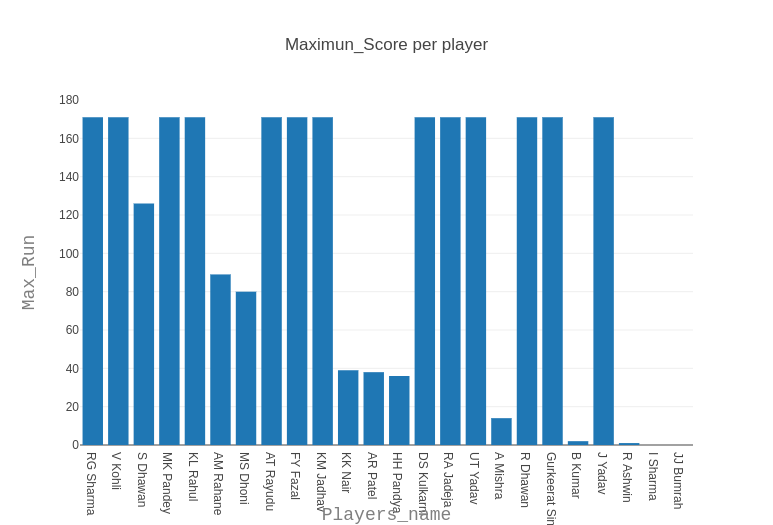

In [22]:
from IPython.display import Image
Image(filename='f1.png')

In [30]:
data = [go.Bar(
            x=np.array(dfx['player_name']),
            y=np.array(dfx['total_run'])
            
    )]

layout = go.Layout(
    
    title='Total_Run per player',
    xaxis=dict(
        title='Players_name',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Total_run',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ayon.mi1/0 or inside your plot.ly account where it is named 'basic-bar'


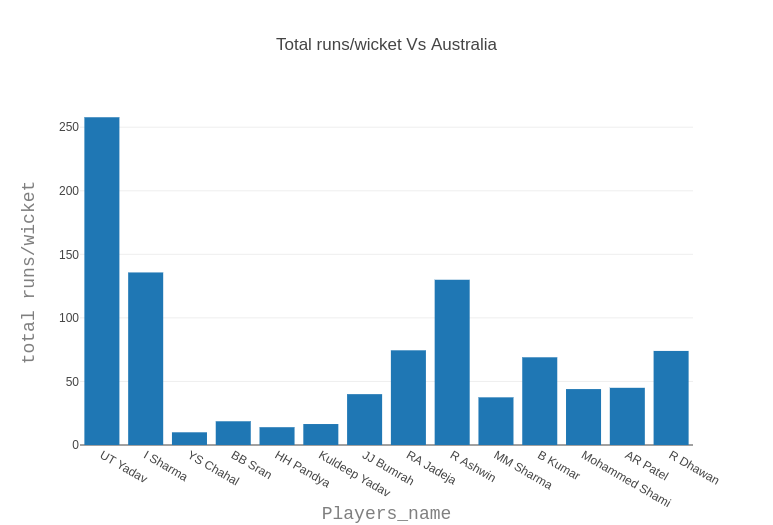

In [23]:
from IPython.display import Image
Image(filename='f2.png')